In [1]:
# GitHub link -> https://github.com/eka-lotus/Intro-to-Machine-Learning/tree/HW-1---Curve-Fit-Training-Models
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

[ 2.17168187  0.9093249   0.73247849 31.4529185 ]


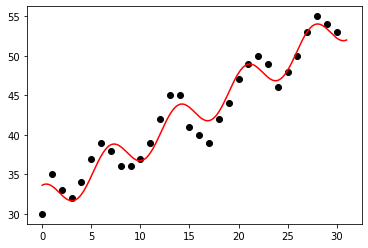

In [2]:
# Define the objective function
def func(x, a, b, c, d):
    return a * np.cos(b * x) + c * x + d

# Generate some sample data
xdata = np.arange(0,31)
ydata = np.array([30,35,33,32,34,37,39,38,36,36,37,39,42,45,45,41,40,39,42,44,47,49,50,49,46,48,50,53,55,54,53])

# Define the least-squares error function
def ls_error(c, x, y):
    e2 = np.sqrt(1/xdata.size * np.sum((func(xdata,c[0], c[1], c[2], c[3])- y)**2))
    #e2 = np.sqrt((1/len(xdata)) * np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2))
    return e2

# Set the initial guess parameter for minimizing error
c0 = np.array([3, 1*np.pi/4, 2/3, 32])   # 3 pi/4 2/3 32

# Perform optimization
res= opt.minimize(ls_error, c0, args=(xdata, ydata), method='Nelder-Mead')

# Get the optimized parameters
c = res.x

print(c)

x2 = np.arange(0, 31.01, 0.01)
yfit2 = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])

# Plot the data and the fitted function
plt.plot(np.arange(0, 31), ydata, 'ko')
plt.plot(x2, yfit2, 'r-')
plt.show()

Minimum error:  1.592725853040056
A:  2.1716818723637914
B:  0.9093249029166655
C:  0.7324784894461773
D:  31.45291849616531


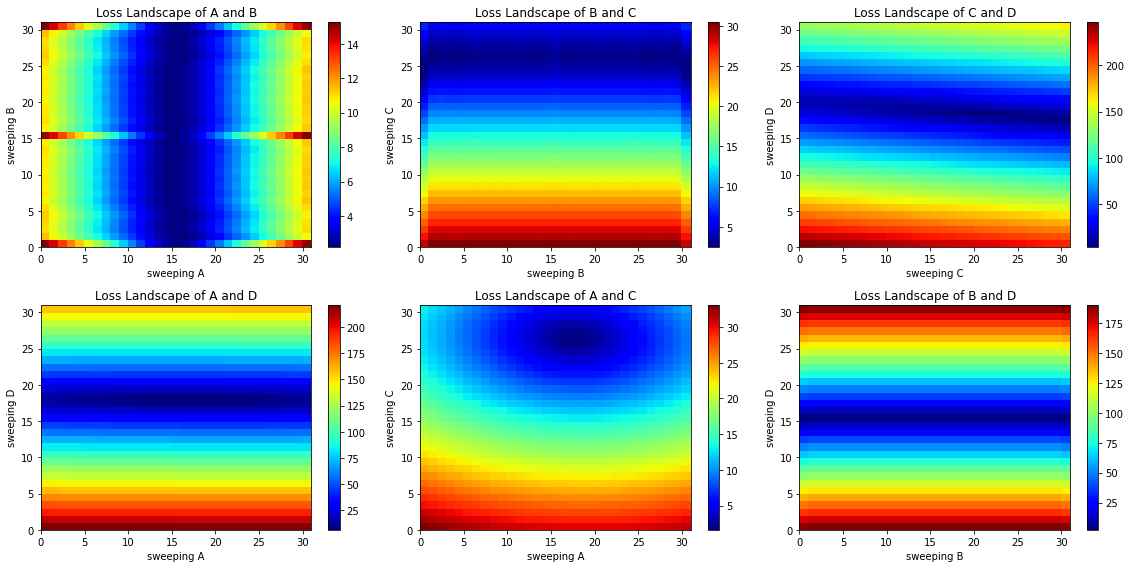

In [3]:
# Compute the minimum error
error = ls_error(c, xdata, ydata)
print("Minimum error: ", error)
print("A: ", c[0])
print("B: ", c[1])
print("C: ", c[2])
print("D: ", c[3])

# Plot a 2D loss (error) landscape

# Create an array of values to sweep
a_sweep = np.linspace(-15,15 ,31)
b_sweep = np.linspace(0,2*np.pi,31)
c_sweep = np.linspace(-1,1,31)
d_sweep = np.pi*np.linspace(-60,60,31)

# Compute loss for each parameter pair
loss_grid = np.zeros((a_sweep.size, b_sweep.size))

# Sweep through A and B; keep C and D constant
for i in range(a_sweep.size):
    for j in range(a_sweep.size):
        loss_grid[j,i] = ls_error([a_sweep[i], b_sweep[j], c[2], c[3]], xdata, ydata)
        
        
# Plot landscape
fig = plt.figure(1,figsize=(16,8)) 

plt.subplot(2,3,1)
plt.pcolor(loss_grid, cmap='jet')
plt.xlabel('sweeping A')
plt.ylabel('sweeping B')
plt.title('Loss Landscape of A and B')
plt.colorbar()


# Sweep through B and C; keep A and D constant
for i in range(a_sweep.size):
    for j in range(a_sweep.size):
        loss_grid[j,i] = ls_error([c[0], b_sweep[i], c_sweep[j], c[3]], xdata, ydata)
          
# Plot landscape
plt.subplot(2,3,2)
plt.pcolor(loss_grid, cmap='jet')
plt.xlabel('sweeping B')
plt.ylabel('sweeping C')
plt.title('Loss Landscape of B and C')
plt.colorbar()


# Sweep through C and D; keep A and B constant
for i in range(a_sweep.size):
    for j in range(a_sweep.size):
        loss_grid[j,i] = ls_error([c[0], c[1], c_sweep[i], d_sweep[j]], xdata, ydata)
          
# Plot landscape
plt.subplot(2,3,3)
plt.pcolor(loss_grid, cmap='jet')
plt.xlabel('sweeping C')
plt.ylabel('sweeping D')
plt.title('Loss Landscape of C and D')
plt.colorbar()


# Sweep through A and D; keep B and C constant
for i in range(a_sweep.size):
    for j in range(a_sweep.size):
        loss_grid[j,i] = ls_error([a_sweep[i], c[1] , c[2], d_sweep[j]], xdata, ydata)
          
# Plot landscape
plt.subplot(2,3,4)
plt.pcolor(loss_grid, cmap='jet')
plt.xlabel('sweeping A')
plt.ylabel('sweeping D')
plt.title('Loss Landscape of A and D')
plt.colorbar()


# Sweep through A and C; keep B and D constant
for i in range(a_sweep.size):
    for j in range(a_sweep.size):
        loss_grid[j,i] = ls_error([a_sweep[i], c[1] , c_sweep[j], c[3]], xdata, ydata)
          
# Plot landscape
plt.subplot(2,3,5)
plt.pcolor(loss_grid, cmap='jet')
plt.xlabel('sweeping A')
plt.ylabel('sweeping C')
plt.title('Loss Landscape of A and C')
plt.colorbar()


# Sweep through B and D; keep A and C constant
for i in range(a_sweep.size):
    for j in range(a_sweep.size):
        loss_grid[j,i] = ls_error([c[0], b_sweep[i], c[2], d_sweep[j] + 30], xdata, ydata)
          
# Plot landscape
plt.subplot(2,3,6)
plt.pcolor(loss_grid, cmap='jet')
plt.xlabel('sweeping B')
plt.ylabel('sweeping D')
plt.title('Loss Landscape of B and D')
plt.colorbar()

fig.tight_layout()
plt.show()

/Users/Lenovo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


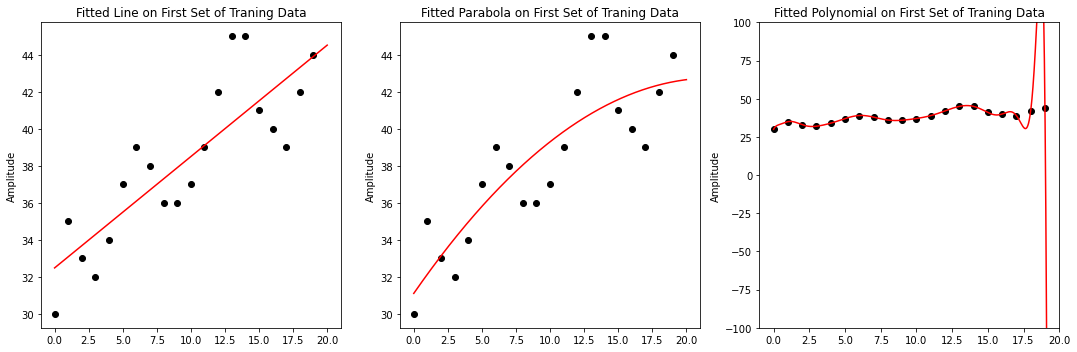

In [27]:
# Get training data from the first 20 data points
td_y = ydata[:20]
td_x = np.arange(0,20)

# Set the initial guess parameter for minimizing error
c1 = np.array([3, 1/3])   # 3 pi/4 2/3 32

# Define function for fitted line (with 2 constants)
def ls_error_line(c, x, y):
    e2 = np.sqrt(1/xdata.size * np.sum((c[0]*x + c[1]- y)**2))
    return e2

# Perform optimization
res_l= opt.minimize(ls_error_line, c1, args=(td_x, td_y), method='Nelder-Mead')

# Get the optimized parameters
s1 = res_l.x

# Get FITTED LINE for the training data
x_fit = np.arange(0, 20.01, 0.01)
y_fit = (s1[0]*x_fit)+s1[1]

# Plot the data and the fitted function
fig = plt.figure(2,figsize=(15,5)) 

plt.subplot(1,3,1)
plt.plot(td_x, td_y, 'ko')
plt.plot(x_fit, y_fit, 'r-')
plt.title('Fitted Line on First Set of Traning Data')
plt.ylabel('Amplitude')




# Define function for fitted parabola (with 3 constants)
def ls_error_parabola(c, x, y):
    e2 = np.sqrt((1/xdata.size) * np.sum((c[0]*x**2 + c[1]*x + c[2] - y)**2))
    return e2

# Set the initial guess parameter for minimizing error
c2 = np.array([3, 1*np.pi/4, 2/3])   # 3 pi/4 2/3 32

# Perform optimization
res_p= opt.minimize(ls_error_parabola, c2, args=(td_x, td_y), method='Nelder-Mead')

# Get the optimized parameters
s2 = res_p.x

# Get FITTED PARABOLA for training data
y_fit2 = s2[0]*x_fit**2 + s2[1]*x_fit + s2[2]

# Plot the data and the fitted function
plt.subplot(1,3,2)
plt.plot(td_x, td_y, 'ko')
plt.plot(x_fit, y_fit2, 'r-')
plt.title('Fitted Parabola on First Set of Traning Data')
plt.ylabel('Amplitude')





# Get FITTED POLYNOMIAL for training data
def ls_error_poly(c, x, y):
    e2 = np.sqrt(1/(xdata.size) * np.sum((np.polyval(c,x)-y)**2))
    return e2

# Use np.polyfit to find the optimized parameters for the fitted polynomial function
c3 = np.polyfit(td_x, td_y, 19)

# Get FITTED POLYNOMIAL for the training data
x_fit3 = np.arange(0, 20.01, 0.01)
y_fit3 = np.polyval(c3,x_fit3)

# Plot the data and the fitted function
plt.subplot(1,3,3)
plt.plot(td_x, td_y, 'ko')
plt.plot(x_fit3, y_fit3, 'r-')
plt.ylim(-100,100)
plt.xlim(-1,20)
plt.title('Fitted Polynomial on First Set of Traning Data')
plt.ylabel('Amplitude')

fig.tight_layout()
plt.show()


In [21]:
# Test model to remaining 10 datapoints
test_y1 = ydata[21:31]
test_x1 = np.arange(0,10)

# Compute the error of testing model with the test data

# Minimum error of Fitted Line
error_line = ls_error_line(s1, test_x1, test_y1)
print('Error of linear fit:', error_line)


# Minimum error of Fitted Parabola
error_parabola = ls_error_parabola(s2, test_x1, test_y1)
print('Error of parabola fit:', error_parabola)


# Minimum error of Fitted 19th Degree Polynomial
error_poly = ls_error_poly(c3, test_x1, test_y1)
print('Error of polynomial fit:', error_poly)


Error of linear fit: 8.872571457046035
Error of parabola fit: 8.8788334860223
Error of polynomial fit: 8.983964598801377


/Users/Lenovo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


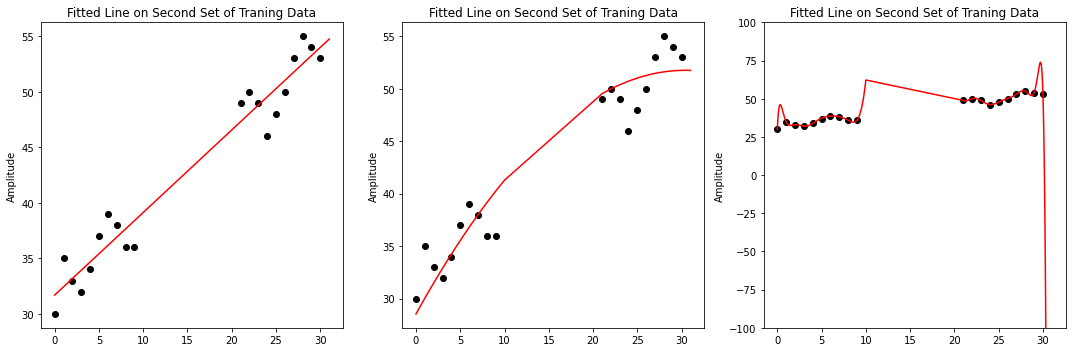

In [28]:
# Get training data from the first 10 and last 10 data points
td_x2 = np.concatenate((np.arange(0, 10), np.arange(21, 31)))
td_y2 = np.concatenate((ydata[:10], ydata[-10:]))

# Set the initial guess parameter for minimizing error
c1 = np.array([2/3, 32])   # 3 pi/4 2/3 32

# Define function for fitted line (with 2 constants)
def ls_error_line(c, x, y):
    e2 = np.sqrt(1/xdata.size * np.sum((c[0]*x + c[1]- y)**2))
    return e2

# Perform optimization
res_l= opt.minimize(ls_error_line, c1, args=(td_x2, td_y2), method='Nelder-Mead')

# Get the optimized parameters
s1 = res_l.x

# Get FITTED LINE for the training data
x_fit = np.concatenate((np.arange(0, 10.01, 0.01), np.arange(21, 31.01, 0.01)))
y_fit = (s1[0]*x_fit)+s1[1]

# Plot the data and the fitted function
fig = plt.figure(3,figsize=(15,5)) 

plt.subplot(1,3,1)
plt.plot(td_x2, td_y2, 'ko')
plt.plot(x_fit, y_fit, 'r-')
plt.title('Fitted Line on Second Set of Traning Data')
plt.ylabel('Amplitude')






# Define function for fitted parabola (with 3 constants)
def ls_error_parabola(c, x, y):
    e2 = np.sqrt((1/xdata.size) * np.sum((c[0]*x**2 + c[1]*x + c[2] - y)**2))
    return e2

# Set the initial guess parameter for minimizing error
c2 = np.array([100, 1/2, -32])   # 3 pi/4 2/3 32

# Perform optimization
res_p= opt.minimize(ls_error_parabola, c2, args=(td_x2, td_y2), method='Nelder-Mead')

# Get the optimized parameters
s2 = res_p.x

# Get FITTED PARABOLA for training data
y_fit2 = s2[0]*x_fit**2 + s2[1]*x_fit + s2[2]

# Plot the data and the fitted function
plt.subplot(1,3,2)
plt.plot(td_x2, td_y2, 'ko')
plt.plot(x_fit, y_fit2, 'r-')
plt.title('Fitted Line on Second Set of Traning Data')
plt.ylabel('Amplitude')





# Get FITTED POLYNOMIAL for training data
def ls_error_poly(c, x, y):
    e2 = np.sqrt(1/(x.size+1) * np.sum((np.polyval(c, x)-y)**2))
    return e2

# Set the initial guess parameter for minimizing error
c3 = np.polyfit(td_x2, td_y2, 19)


# Get FITTED POLYNOMIAL for the training data
x_fit3 = np.concatenate((np.arange(0, 10.01, 0.01), np.arange(21, 31.01, 0.01)))
y_fit3 = np.polyval(c3, x_fit3)

# Plot the data and the fitted function
plt.subplot(1,3,3)
plt.plot(td_x2, td_y2, 'ko')
plt.plot(x_fit3, y_fit3, 'r-')
plt.ylim(-100,100)
plt.title('Fitted Line on Second Set of Traning Data')
plt.ylabel('Amplitude')

fig.tight_layout()
plt.show()

In [22]:
# Test model to remaining 10 datapoints
test_y2 = ydata[11:21]
test_x2 = np.arange(0,10)

# Compute the error of testing model with the test data

# Minimum error of Fitted Line
error_line = ls_error_line(s1, test_x2, test_y2)
print('Error of linear fit:', error_line)


# Minimum error of Fitted Parabola
error_parabola = ls_error_parabola(s2, test_x2, test_y2)
print('Error of parabola fit:', error_parabola)


# Minimum error of Fitted 19th Degree Polynomial
error_poly = ls_error_poly(c3, test_x2, test_y2)
print('Error of polynomial fit:', error_poly)

Error of linear fit: 4.349457136903958
Error of parabola fit: 4.419167987022885
Error of polynomial fit: 4.761602026870715


sdasdsada
